In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import copy
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[0], 'GPU')

In [3]:
import os
import sys

path_common=os.path.dirname(os.path.abspath(''))+"/Common/";
sys.path.append(path_common) #Adds common path to import the python files

In [5]:
from DatasetFuncs import allDataset_loader,dataset_split,show_porcentages,show_partition_nanopores
from DataLoader import DataLoader

data_folder="../../ext/QuipuData/"; #path where the datasets are/will be stored
allDatasets=allDataset_loader(data_folder) 
trainSet,testSet=dataset_split(allDatasets)
df=trainSet;

In [10]:
X=np.vstack( df.trace )

In [32]:
def get_lens(X,ev_start_th=-0.25,ev_end_th=-0.5):
    X_lens=np.zeros(len(X));
    ids_start=np.zeros(len(X));
    ids_end=np.zeros(len(X));
    for i in range(len(X)):
        currX=X[i,:];
        ids_start[i]=np.argwhere(currX<ev_start_th)[0,0];
        ids_end[i]=np.argwhere(currX<ev_end_th)[-1,0];
        X_lens[i]=ids_end[i]-ids_start[i];
    return X_lens,ids_start,ids_end

X_lens,X_ids_start,X_ids_end=get_lens(X);

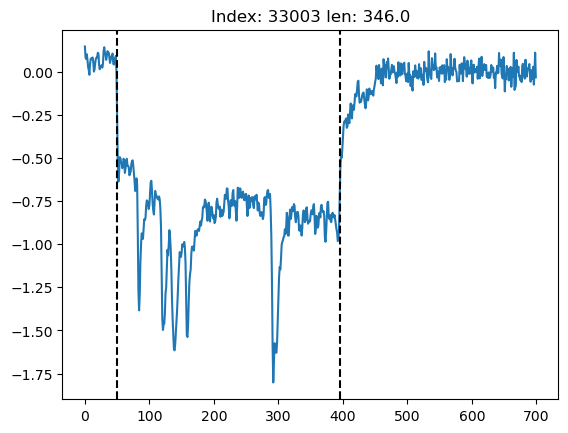

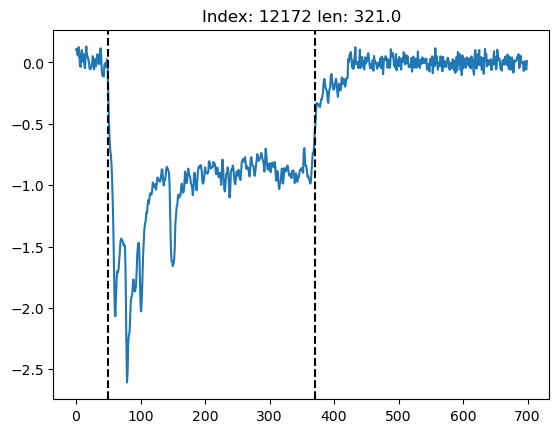

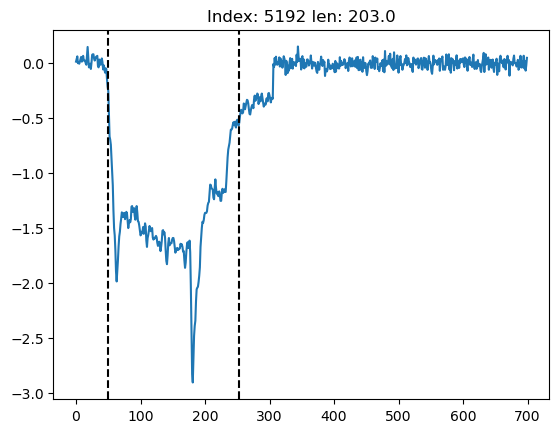

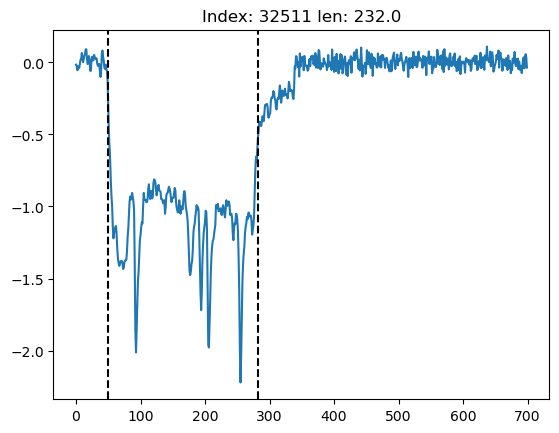

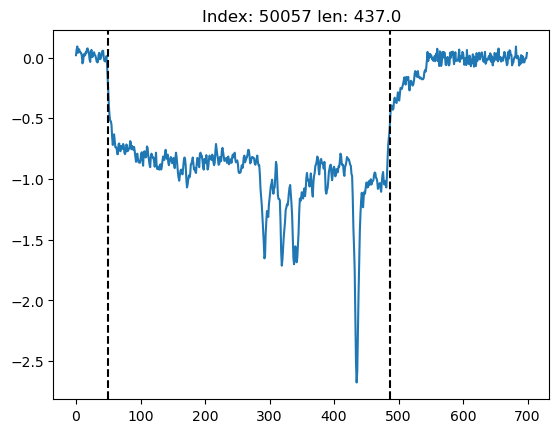

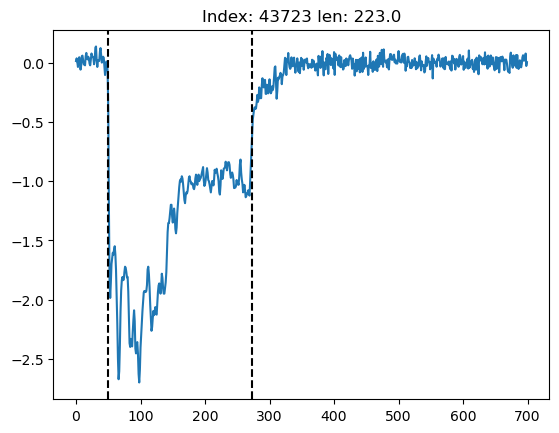

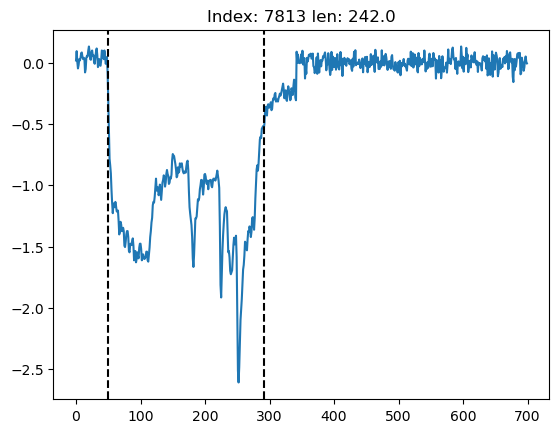

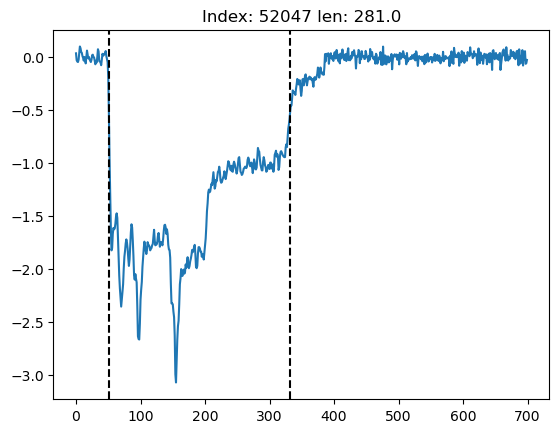

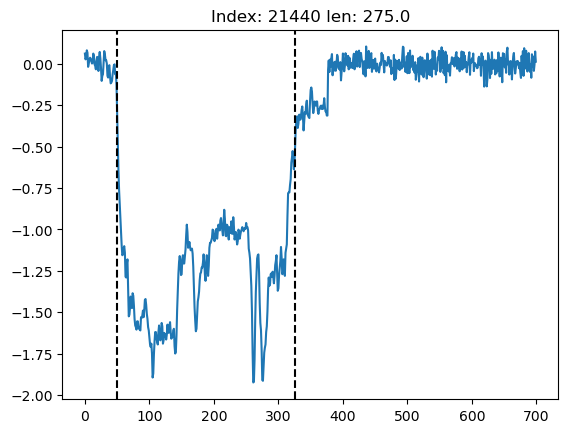

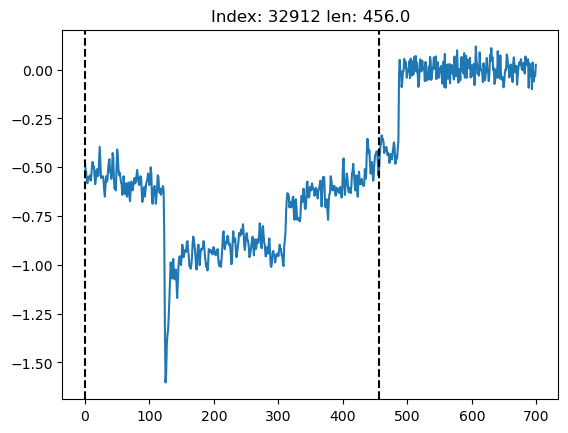

In [33]:
#Plotting some events for showing if idxs are corresponding:
def plot_some_examples(X,X_ids_start,X_ids_end,n_plot=10):
    np.random.seed(1);
    idxs_plot=np.random.randint(len(X), size=n_plot);
    for i in range(n_plot):
        idx=idxs_plot[i]
        ev_data=X[idx,:];
        id_start=X_ids_start[idx];
        id_end=X_ids_end[idx];
        plt.plot(ev_data,label="Original trace")
        plt.axvline(x = id_start, color = 'black', linestyle="--")
        plt.axvline(x = id_end, color = 'black', linestyle="--")
        str_title= "Index: " + str(idx) + " len: "+ str(id_end-id_start);
        plt.title(str_title)
        plt.show()
        
plot_some_examples(X,X_ids_start,X_ids_end,n_plot=10)

In [31]:
from DataAugmentator import DataAugmentator
da=DataAugmentator(brow_std=0.9);
XAug=da.brow_aug(X);

Instructions for updating:
Use tf.identity instead.


In [36]:
XAug_lens,XAug_ids_start,XAug_ids_end=get_lens(XAug);

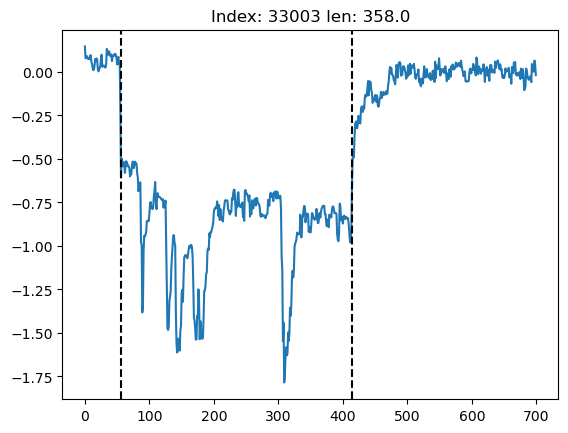

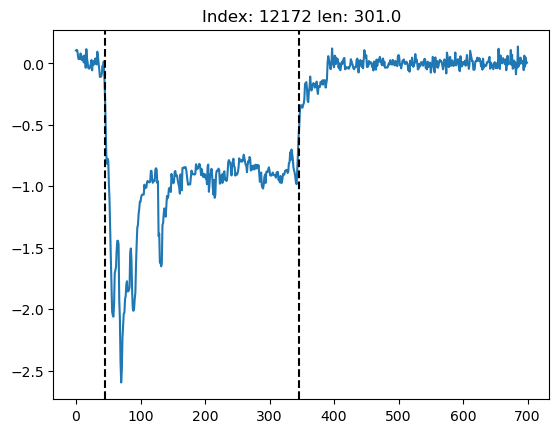

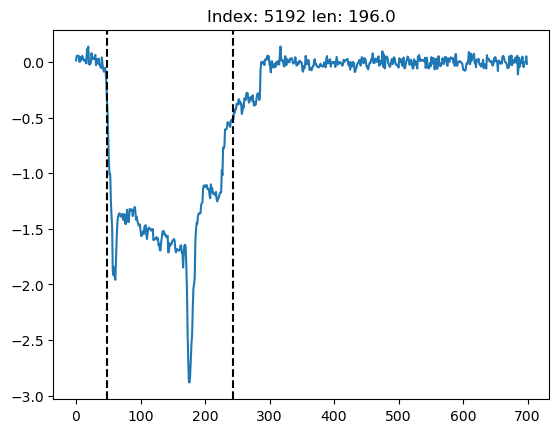

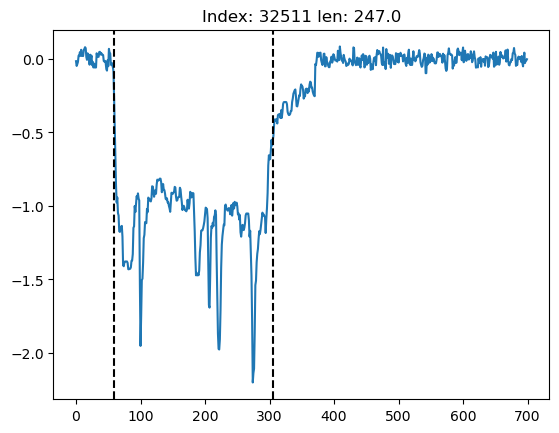

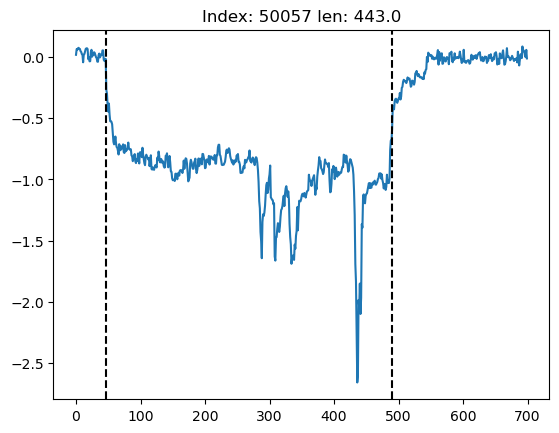

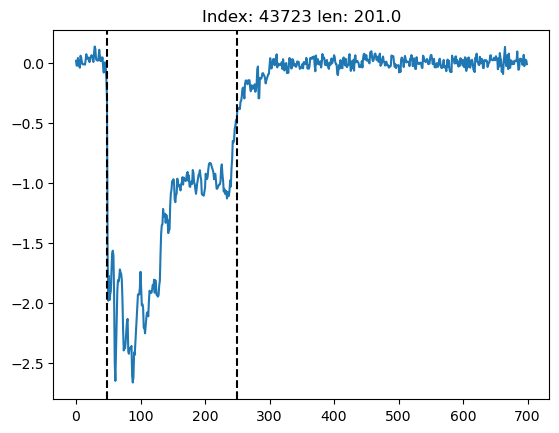

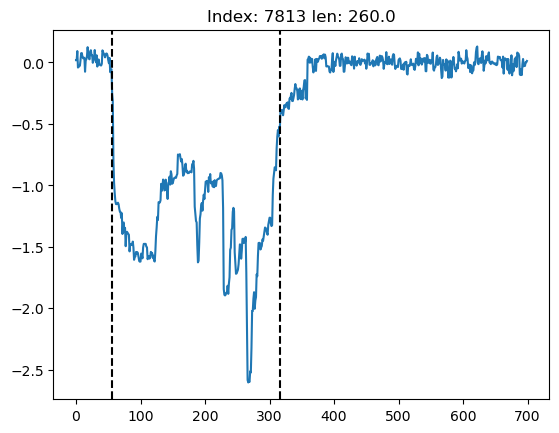

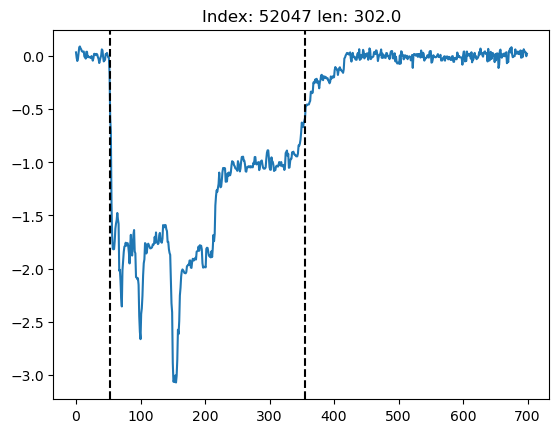

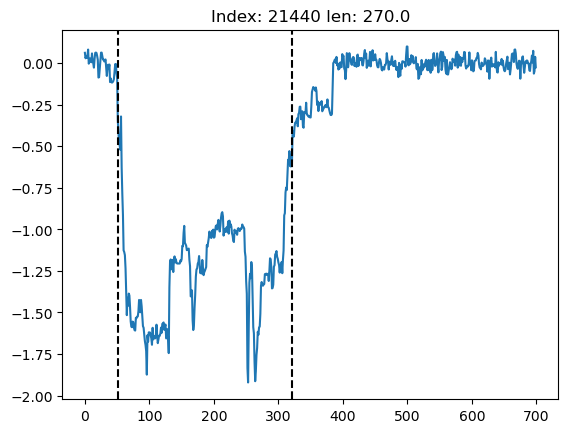

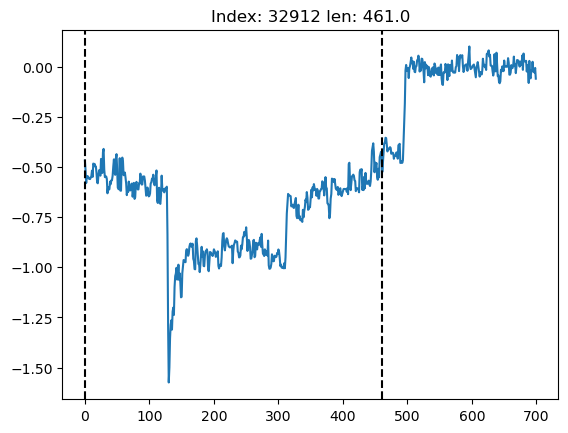

In [37]:
plot_some_examples(XAug,XAug_ids_start,XAug_ids_end,n_plot=10)

In [39]:
stretch_coef=np.divide(XAug_lens,X_lens)

0.9986699858960955
0.0548229893092542


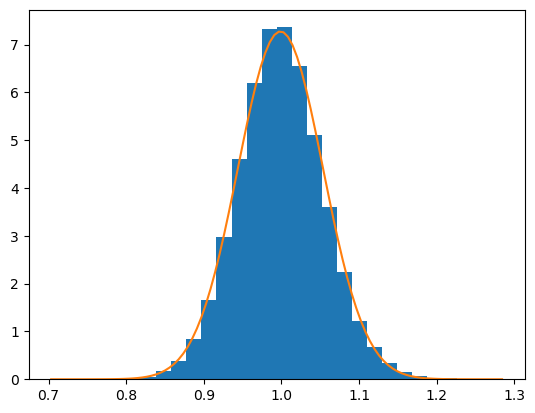

In [46]:
import scipy.stats as stats
plt.hist(stretch_coef,bins=30, density=True)
x = np.linspace(np.min(stretch_coef), np.max(stretch_coef), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(stretch_coef), np.std(stretch_coef)))
print(np.mean(stretch_coef))
print(np.std(stretch_coef))

In [42]:
np.min(stretch_coef)

0.7033898305084746